In [10]:
import os
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
import tifffile
import yaml

import mushroom.utils as utils

In [2]:
metadata = yaml.safe_load(open('/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/metadata.yaml'))
metadata

{'HT112C1': {'data': {'visium': {'HT112C1-U1': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s0_visium_processed.h5ad',
    'HT112C1-U2': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s1_visium_processed.h5ad'}},
  'ids': ['s0', 's1'],
  'order': ['HT112C1-U1', 'HT112C1-U2'],
  'registered_pixels_per_micron': 2.480402478562179,
  'scale': 0.1},
 'HT206B1': {'data': {'visium': {'HT206B1-U2': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s0_visium_processed.h5ad',
    'HT206B1-U3': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s1_visium_processed.h5ad',
    'HT206B1-U4': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s2_visium_processed.h5ad',
    'HT206B1-U5': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT206B1/s3_visium_processed.h5ad'}},
  'ids': ['s0', 's1', 's2', 's

In [3]:
print('case', 'num_slides')
for case, data in metadata.items():
    print(case, len(data['order']))

case num_slides
HT112C1 2
HT206B1 4
HT225C1 5
HT226C1 2
HT235B1 2
HT243B1-H3 4
HT243B1-H4 2
HT268B1 5
HT271B1 4
HT339B1 2
HT397B1 6
HT413C1 3
HT448C1 2


In [5]:
a = sc.read_h5ad('/diskmnt/Projects/Users/estorrs/mushroom/data/projects/subclone/registered/HT112C1/s0_visium_processed.h5ad')
a

AnnData object with n_obs × n_vars = 1975 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'Filtered tumor regions', 'Filtered tumor regions auto', 'Filtered tumor vs. TME', 'Manual annotation', 'Morphologically processed purity', 'Purity', 'TME before boundary', 'TME boundary', 'Tumor before boundary', 'Tumor boundary', 'Tumor regions', 'Tumor vs. TME', 'barcode', 'library_id', 'original', 'sample_id', 'subclone'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
a.obs.iloc[0]

in_tissue                                            1
array_row                                           50
array_col                                          102
FC1                                                4.0
FC2                                              656.0
FC3                                                4.0
FC4                                              656.0
FC5                                                4.0
FC6                                              656.0
Filtered tumor regions                             5.0
Filtered tumor regions auto                        5.0
Filtered tumor vs. TME                           Tumor
Manual annotation                                  5.0
Morphologically processed purity              0.811476
Purity                                        0.880454
TME before boundary                                NaN
TME boundary                                       NaN
Tumor before boundary                              NaN
Tumor boun

In [18]:
def display_registration(ids, fps, color=None, alpha_img=0., force_categorical=False, legend_loc='right margin'):
    fig, axs = plt.subplots(ncols=len(fps))
    for sid, fp, ax in zip(ids, fps, axs):
        adata = sc.read_h5ad(fp)
        
        if force_categorical:
            adata.obs[color] = [str(x) for x in adata.obs[color]]
        
        d = next(iter(adata.uns['spatial'].values()))
        scale = d['scalefactors']['tissue_hires_scalef']
        h, w = int(d['images']['hires'].shape[0] / scale), int(d['images']['hires'].shape[1] / scale)
        ax = sc.pl.spatial(
            adata, color=color, alpha_img=alpha_img, ax=ax, show=False, title=sid, legend_loc=legend_loc,
            colorbar_loc=None, crop_coord=(0, w, 0, h))[0]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        

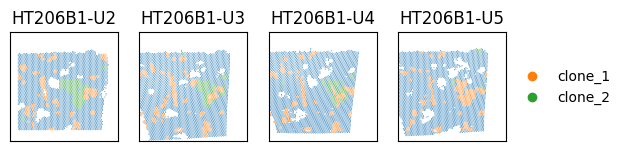

In [11]:
data = metadata['HT206B1']
fps = [data['data']['visium'][data['order'][data['ids'].index(sid)]]
       for sid in data['ids']]
display_registration(data['order'], fps, color='subclone', alpha_img=0.)

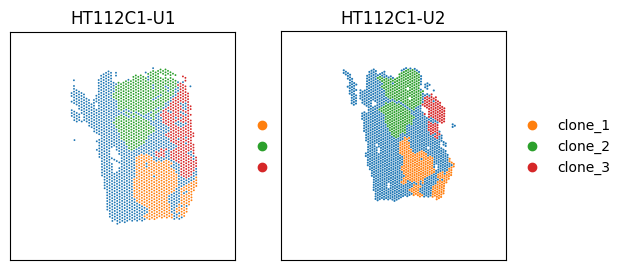

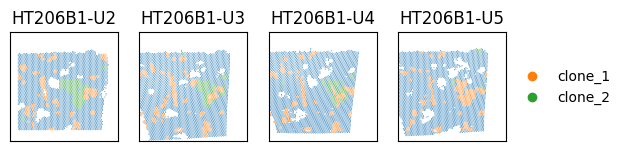

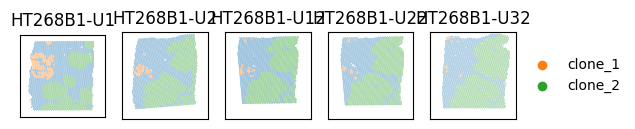

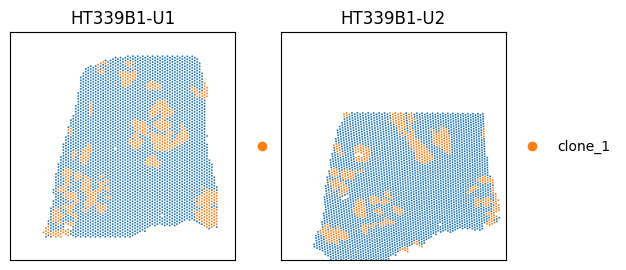

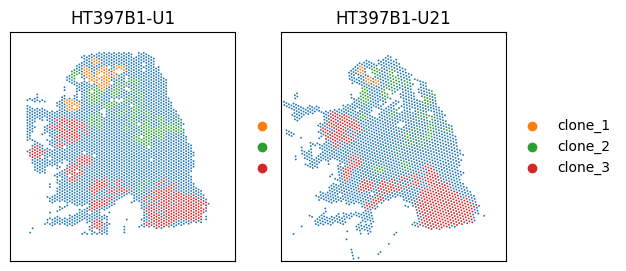

In [13]:
for case, data in metadata.items():
    order = [data['order'][data['ids'].index(sid)]
             for sid in data['ids'] if data['order'][data['ids'].index(sid)] in data['data']['visium']]
    fps = [data['data']['visium'][sample] for sample in order]
    if len(set(sc.read_h5ad(fps[0]).obs['subclone'].to_list())) > 1:
        display_registration(order, fps, color='subclone')
        plt.show()

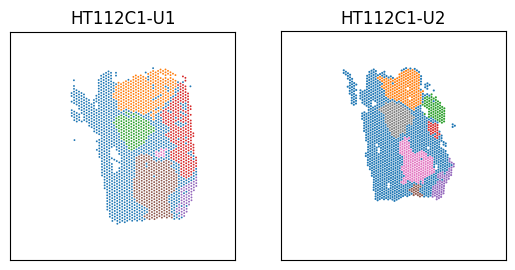

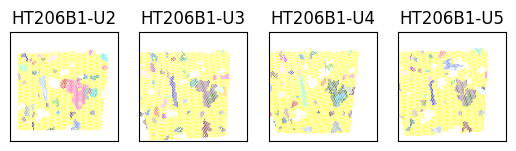

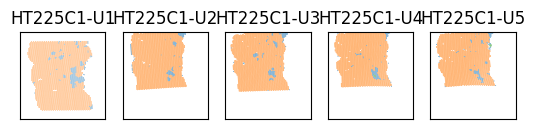

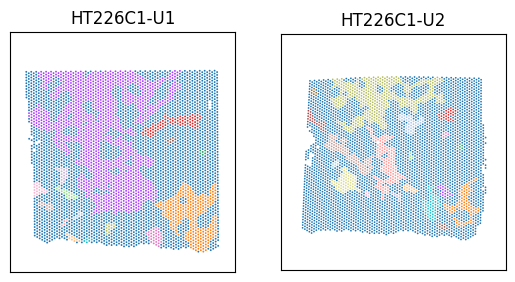

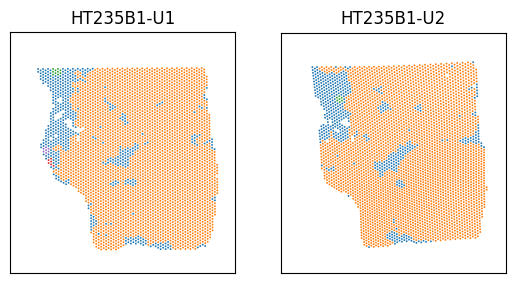

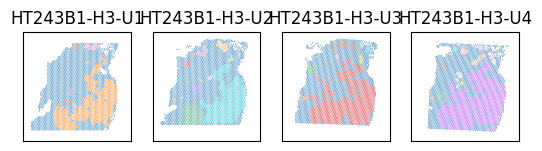

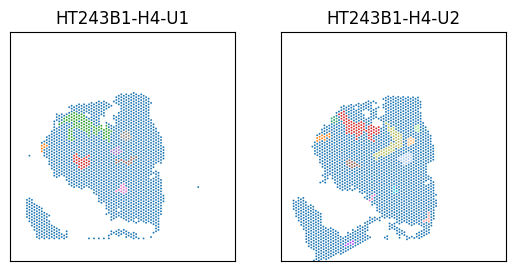

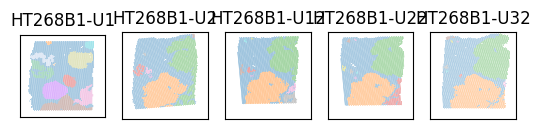

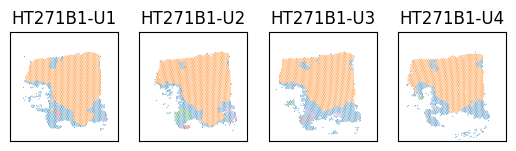

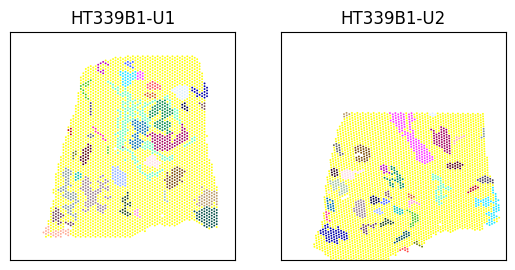

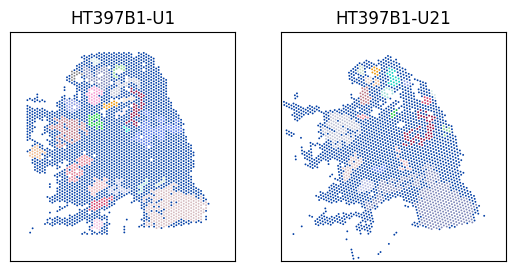

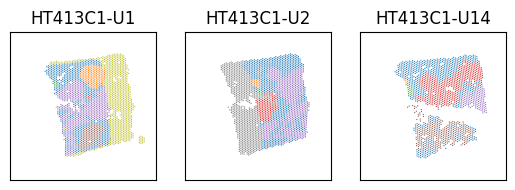

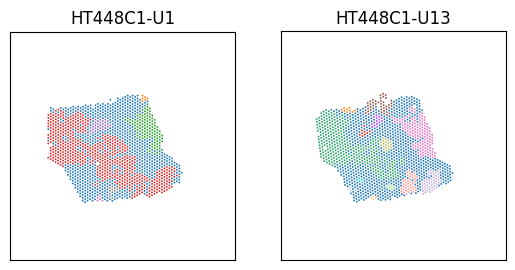

In [19]:
for case, data in metadata.items():
    order = [data['order'][data['ids'].index(sid)]
             for sid in data['ids'] if data['order'][data['ids'].index(sid)] in data['data']['visium']]
    fps = [data['data']['visium'][sample] for sample in order]
    if len(set(sc.read_h5ad(fps[0]).obs['Filtered tumor regions'].to_list())) > 1:
        display_registration(order, fps, color='Filtered tumor regions', force_categorical=True, legend_loc=None)
        plt.show()

In [17]:
1

1